# Reproduce figures

Code to generate the figures in:

> Mascolo & Erill, "Information Theory of Composite Sequence Motifs: Mutational and Biophysical Determinants of Complex Molecular Recognition".
> [[pre-print]](https://doi.org/10.1101/2024.11.11.623117).

## Setup

### Gather the data

First, make sure you unzipped the `results.zip` folder, which contains the data to be analyzed by the following code (it can take a while).

### Import functions

The functions that create the plots are imported from `analyze_results.py`.

In [1]:
# import the functions to create the plots from analyze_results.py
import analyze_results as ar

# other libraries
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Reproduce results from (Schneider 2000): $n=1$

When the composite motif is composed of only one element, $n=1$, our framework is equivalent to the classical framework stating that $R_{sequence} \approx R_{frequency}$.

Indeed, when $n=1$, our equation

\begin{equation}
\sum_{i=1}^{n}{R_{sequence(i)}} + \sum_{i=1}^{n-1}{R_{spacer(i)}} \approx -\log_{2}{\left( \frac{\gamma}{G^n} \right)}
\end{equation}

simplifies to $R_{sequence} \approx -\log_{2}{\left( \frac{\gamma}{G} \right)} = R_{frequency}$.

Thus, in the special case when $n=1$, our general theory recapitulates the classical theory for sequence motifs from [(Schneider *et al.*, 1986)](https://doi.org/10.1016/0022-2836(86)90165-8), and our simulations should reproduce the results from the simulations in [(Schneider 2000)](https://doi.org/10.1093/nar/28.14.2794).

CSV file saved here: ../results/Reproduce_Schneider_2000/Rsequence_evolution_data.csv


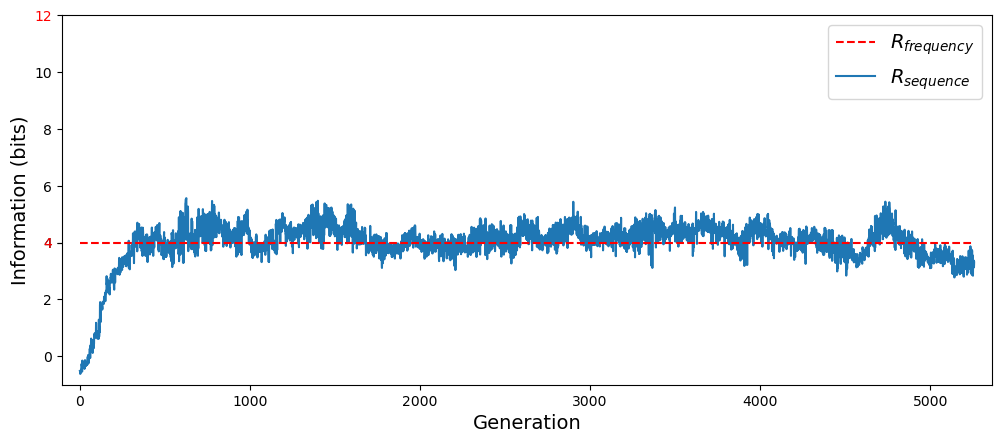

Plot saved to: ../results/Reproduce_Schneider_2000/Rsequence_evolution.png


In [3]:
results_path = '../results/Reproduce_Schneider_2000'
ar.plot_Rsequence_Ev(results_path, labelsfontsize=14)

Information can be negative due to the small sample correction, described in [(Schneider *et al.*, 1986)](https://doi.org/10.1016/0022-2836(86)90165-8). That correction makes the expected value of the information of a random collection of sites $0$. That is the expected value of the information at generation 0 (when the genome is a randomly generated sequence of nucleotides). The smaller the sample (the number of target sites $\gamma$) the bigger the deviation from the expected value (both positive and negative). This is explained in [(Schneider *et al.*, 1986)](https://doi.org/10.1016/0022-2836(86)90165-8).

## Dyad motifs: $n=2$

By setting $n=2$ we can empirically validate our prediction that

\begin{equation}
R_{sequence} + R_{spacer} \approx -\log_{2}{\left( \frac{\gamma}{G^n} \right)}
\end{equation}

where

$R_{sequence} = \sum_{i=1}^{n}{R_{sequence(i)}}$

$R_{spacer} = \sum_{i=1}^{n}{R_{spacer(i)}}$


### Import and prepare the data


In [5]:
results_dir = '../results/Test_Rsequence_plus_Rspacer/'
sample_size = 20

# Prepare data
drifted_df_list = []
for subfolder in os.listdir(results_dir):
    if not os.path.isdir(results_dir + subfolder):
        continue
    initial_df, drifted_df, all_ev, parameters = ar.process_data(results_dir + subfolder + '/', sample_size)
    drifted_df_list.append(drifted_df)

### Generate stacked bar plot

We are ready to test our theory for $n=2$, i.e., test that $R_{sequence(1)} + R_{sequence(2)} + R_{spacer(1)} \approx -\log_{2}{\left( \frac{\gamma}{G^2} \right)}$. We can check that by using stacked bar plots.

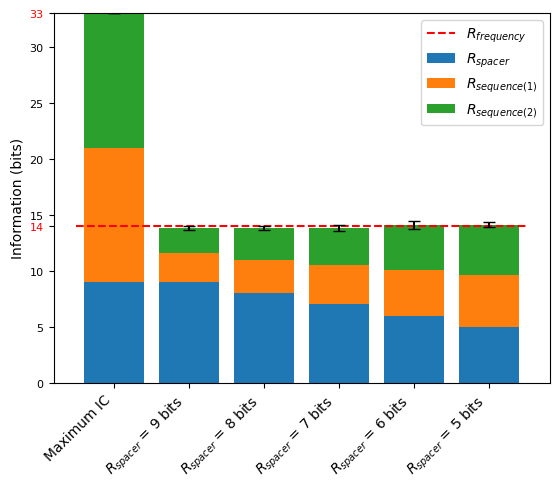

Plot saved to: ../results/Test_Rsequence_plus_Rspacer/Study_Spacer_Barplot_20.png


In [6]:
# Stacked Barplot
ar.study_spacer_stacked_barplot(drifted_df_list, parameters, sample_size, results_dir, spacer_weep=True, labelsfontsize=10)

We explored the entire range of possible values of $R_{spacer}$, from its minimum (5 bits) to its maximum (9 bits). The results support our theory that the total information from all the sources evolves to be approximately $-\log_{2}{\left( \frac{\gamma}{G^n} \right)}$ bits.

### Generate 2D plot

The same data can be mapped onto a 2-dimensional space, as explained in our paper, showing the linear relationship between the total $R_{sequence}$ and the total $R_{spacer}$.

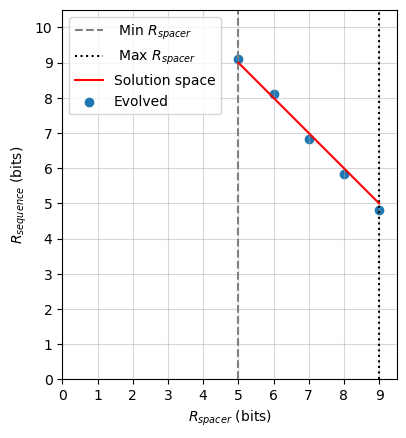

Plot saved to: ../results/Test_Rsequence_plus_Rspacer/2D_plot_with_sim_data.png


In [7]:
# 2D plot
ar.map_dyads_to_2D_plot(drifted_df_list, parameters, sample_size, results_dir, labelsfontsize=10)

### Using Gaussian Connectors

Regenerate Supplementary Figure 1. It shows that theory holds regardless of the recognition mechanism used by the "connector". Instead of a Uniform distribution, here the connector is modeled with a Gaussian distribution. The Gaussian is more realistic, because it is the expected distribution when modeling the protein complex as a harmonic oscillator in a thermal bath, which has a *relaxed state* and an intrinsic *flexibility* (depending on the spring constant $\kappa$).

#### Panel (A)

First experiment.

In [9]:
results_dir = '../results/Test_Rsequence_plus_Rspacer_Gaussian_Conn/'

# (A) PANEL
subfolder = 'Gauss_9sites'
sample_size = None

# Prepare data
initial_df, drifted_df, all_ev, parameters = ar.process_data(results_dir + subfolder + '/', sample_size)

We can visualize the spacer length distribution with the following histogram.

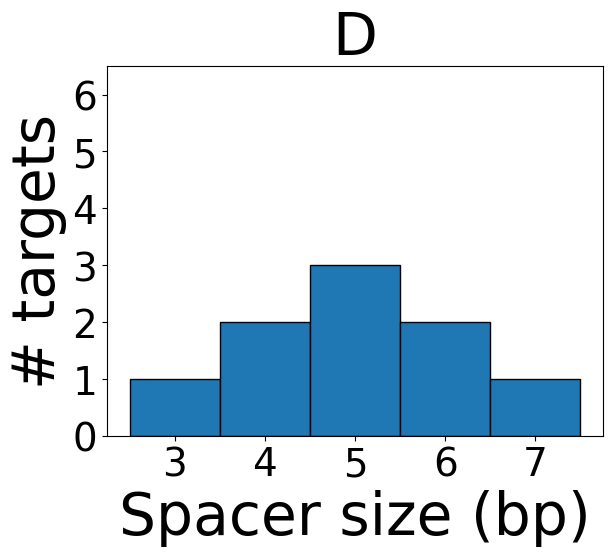

D histogram saved as: ../results/Test_Rsequence_plus_Rspacer_Gaussian_Conn/Gauss_9sites/Hist_for_D.png


In [10]:
# Plot spacer distribution as histogram
spacers = parameters['spacers']
spacers_unique = list(set(spacers))
spacers_unique.sort()
counts = [spacers.count(d) for d in spacers_unique]
ar.plot_D_histogram(spacers_unique, counts, results_dir + subfolder + '/', y_max=6)

For this spacer length distribution, we have that $R_{spacer} = 5.80284027657585$.

We can test our predictions with the same stacked bar plots we used above.

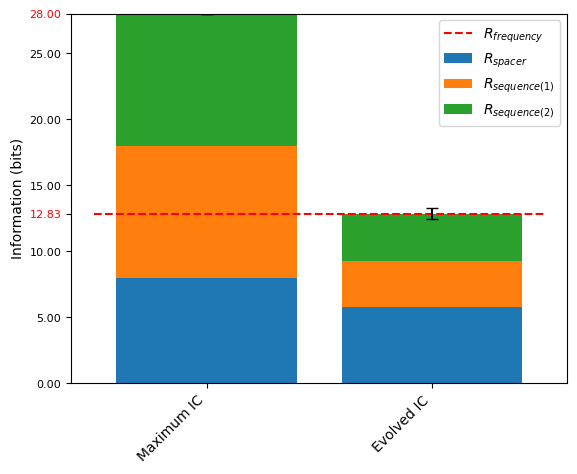

Plot saved to: ../results/Test_Rsequence_plus_Rspacer_Gaussian_Conn/Gauss_9sites/Study_Spacer_Barplot_ALL.png


In [11]:
# Stacked Barplot
ar.study_spacer_stacked_barplot([drifted_df], parameters, sample_size, results_dir + subfolder + '/')

#### Panel (B)

Second experiment.

In [13]:
# (B) PANEL
subfolder = 'Gauss_16sites'
sample_size = None

# Prepare data
initial_df, drifted_df, all_ev, parameters = ar.process_data(results_dir + subfolder + '/', sample_size)

Again, we can visualize the spacer length distribution with a histogram.

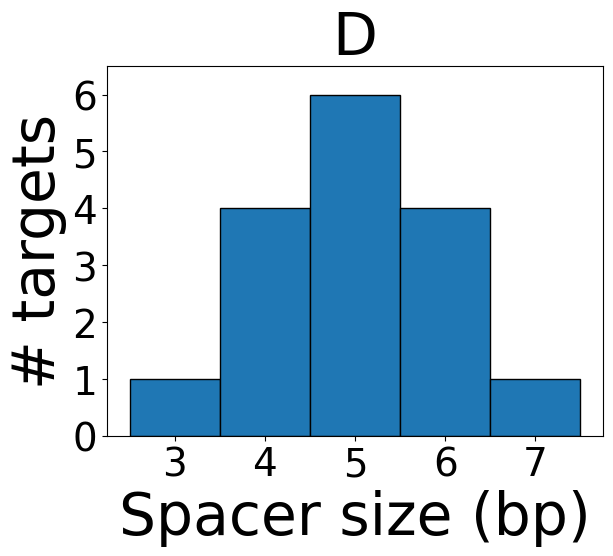

D histogram saved as: ../results/Test_Rsequence_plus_Rspacer_Gaussian_Conn/Gauss_16sites/Hist_for_D.png


In [14]:
# Plot spacer distribution as histogram
spacers = parameters['spacers']
spacers_unique = list(set(spacers))
spacers_unique.sort()
counts = [spacers.count(d) for d in spacers_unique]
ar.plot_D_histogram(spacers_unique, counts, results_dir + subfolder + '/', y_max=6)

For this spacer length distribution, we have that $R_{spacer} = 6.96936093777043$. So, this a more "informative" spacer length distribution.

Again, we can test our prediction using a stacked bar plot.

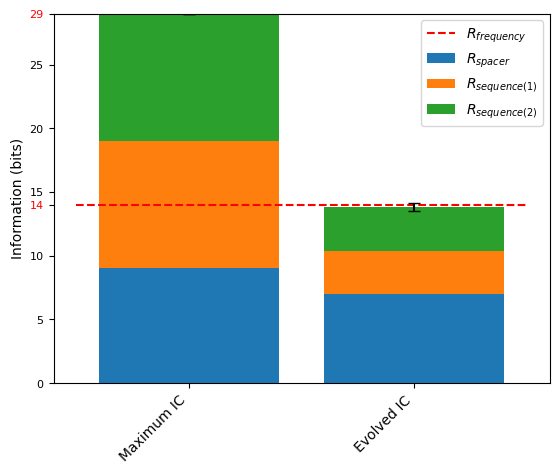

Plot saved to: ../results/Test_Rsequence_plus_Rspacer_Gaussian_Conn/Gauss_16sites/Study_Spacer_Barplot_ALL.png


In [15]:
# Stacked Barplot
ar.study_spacer_stacked_barplot([drifted_df], parameters, sample_size, results_dir + subfolder + '/')

## Study protein-DNA coevolution

We tested that the evolution of the flexibility of the regulator (the spring constant $\kappa$) follows our prediction that the optimal value of $\kappa$ will be one such that $\sigma_{protein}^{2} = \sigma_{targets}^{2}$. Indeed, the value of $\sigma_{protein}^{2}$ depends on the spring constant as follows:

\begin{equation}
\label{sigma_to_kappa}
\sigma_{protein}^2 = \frac{k_BT}{\kappa}
\end{equation}

Results are shown for:
1) An extremely variable spacer
2) A slightly variable spacer

These cases cover the range of observed spacer length variability observed in sequence patterns targeted by bacterial transcription factor complexes.

In [22]:
results_dir = '../results/Spring_Constant_Evo/'
sample_size = None

# Two experiments
exp_1 = 'seven_vals_histogram'
exp_2 = 'three_vals_histogram'

# MAX_N_RUNS = None
MAX_N_RUNS = 25

# THRSH: Missing value tolerance
# (some runs stopped earlier and don't have values for late generations)
THRSH = 10  # no more than 10 missing values allowed

df_1, opt_k_1, params_1 = ar.prepare_spring_const_data(results_dir + exp_1, THRSH, MAX_N_RUNS)
df_2, opt_k_2, params_2 = ar.prepare_spring_const_data(results_dir + exp_2, THRSH, MAX_N_RUNS)

As before, we can visualize the spacer length variability with histograms.

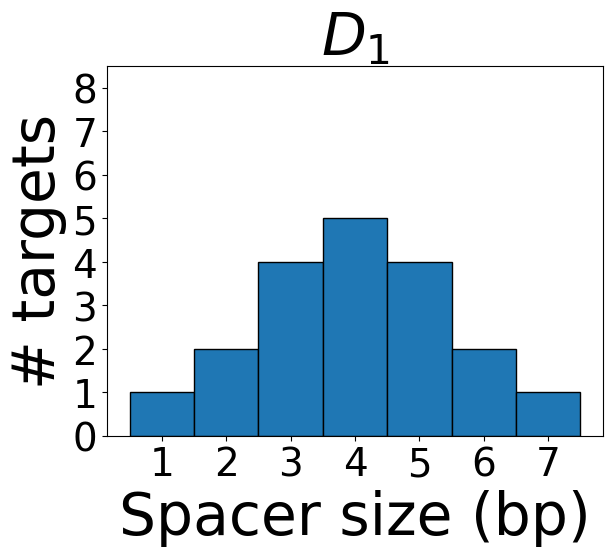

D histogram saved as: ../results/Spring_Constant_Evo/Hist_for_D1.png


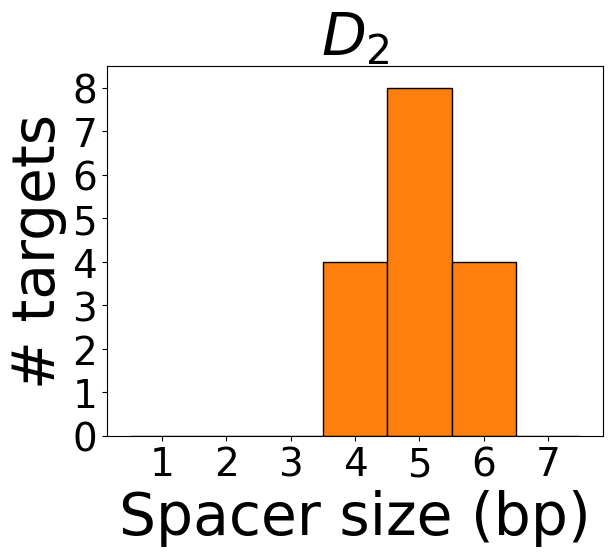

D histogram saved as: ../results/Spring_Constant_Evo/Hist_for_D2.png


In [18]:
# Plot the histograms for the two spacer size distributions (D1 and D2)
ar.plot_D1_D2_histograms(params_1, params_2, results_dir)

The figure below shows the evolution of the spring constant, compared with its predicted optimal value $\kappa_{opt}$.

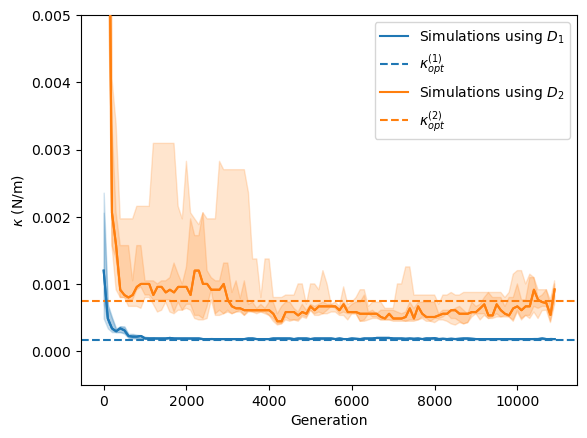

Plot saved to: ../results/Spring_Constant_Evo/Spring_Constant_Evo_Figure_max25runs.png


In [19]:
# Trim dataframes
stop_gen = min(df_2['iter'].max(), df_1['iter'].max())
df_1 = df_1.loc[df_1['iter'] <= stop_gen]
df_2 = df_2.loc[df_2['iter'] <= stop_gen]

# Make line plots with shaded areas
ar.spring_const_plot(df_1, df_2, opt_k_1, opt_k_2, results_dir, MAX_N_RUNS)

The figure shows that we can predict the optimal flexibility of the recognizer complex based on the spacer length variability in the target sites on DNA or RNA.

## Effect of mutation rates

We run competition experiments to test the hypothesis that the optimal balance between $R_{sequence}$ and $R_{spacer}$ depends on the balance between nucleotide substitutions and *indels* (insertions/deletions), due to differential **mutational robustness**.

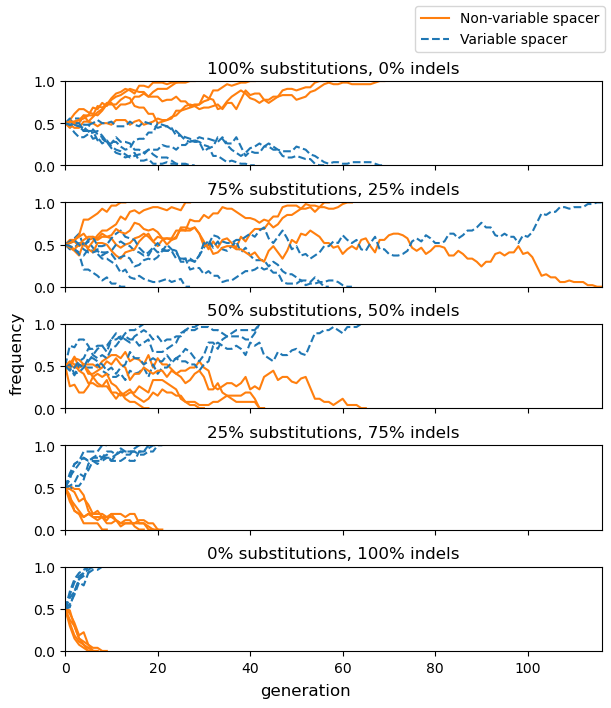

Plot saved to: ../results/Competition_Experiments/Stiff_VS_Flex_indel_1bp/full_competition_experiment_Stiff_VS_Flex_indel_1bp.png


In [20]:
experiment_dirpath = '../results/Competition_Experiments/Stiff_VS_Flex_indel_1bp/'
ar.plot_comp_exp(experiment_dirpath)

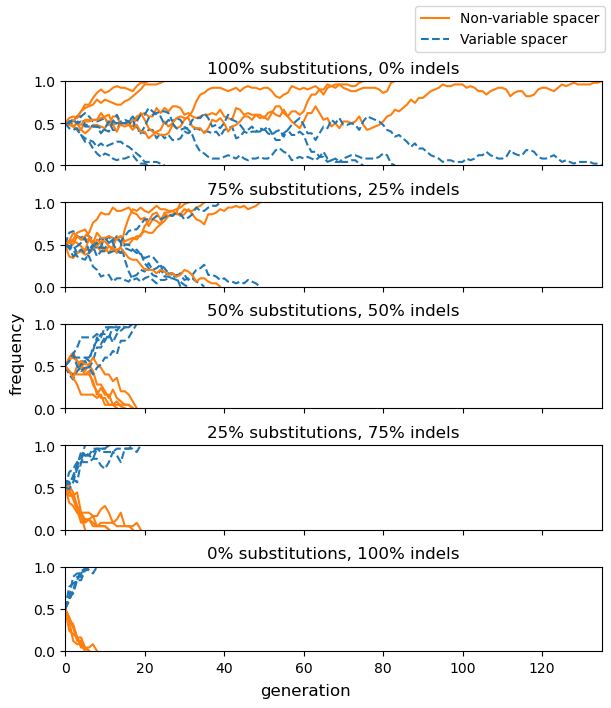

Plot saved to: ../results/Competition_Experiments/Stiff_VS_Med_indel_1bp/full_competition_experiment_Stiff_VS_Med_indel_1bp.png


In [21]:
# Extra Figure (not in paper): Stiff VS Medium
experiment_dirpath = '../results/Competition_Experiments/Stiff_VS_Med_indel_1bp/'
ar.plot_comp_exp(experiment_dirpath, variable_spcr='medium')